# Transformação de imagens

Verificando versão instalada do OpenCV

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
print(cv2.__version__)

#Pop-up do Matplotlib
#%matplotlib qt

#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

3.4.2


/Users/michel.fernandes/anaconda/lib/python3.6/site-packages/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 28] No space left on device.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## Sharpening (Aguçamento)

É uma operação que torna mais evidente e claro os detalhes de uma imagem, especialmente suas bordas.

Text(0.5,1,'Torre')

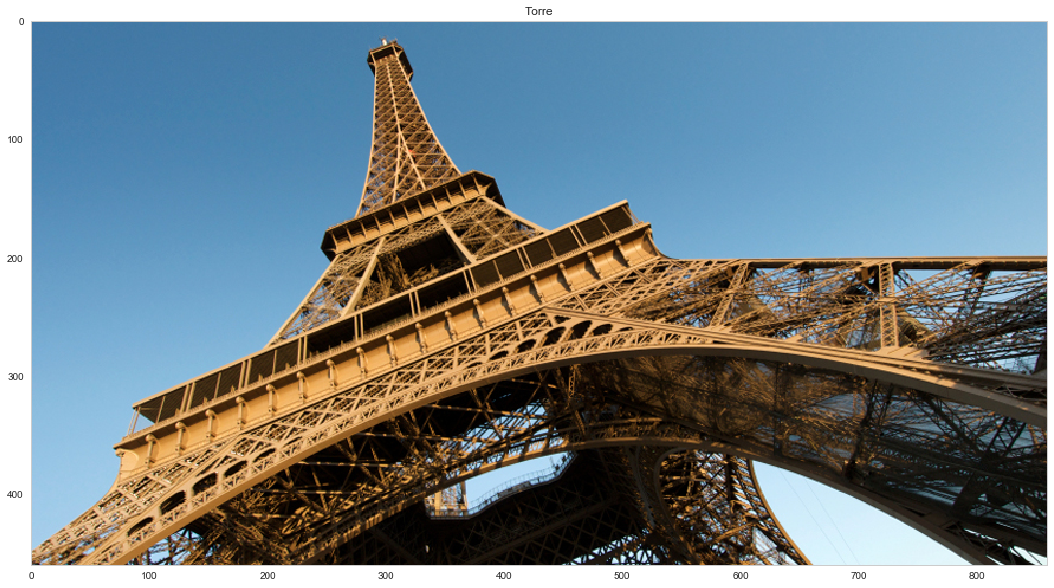

In [6]:
imagem = cv2.imread("imagens/eiffel.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Torre")

Text(0.5,1,'Aguçamento')

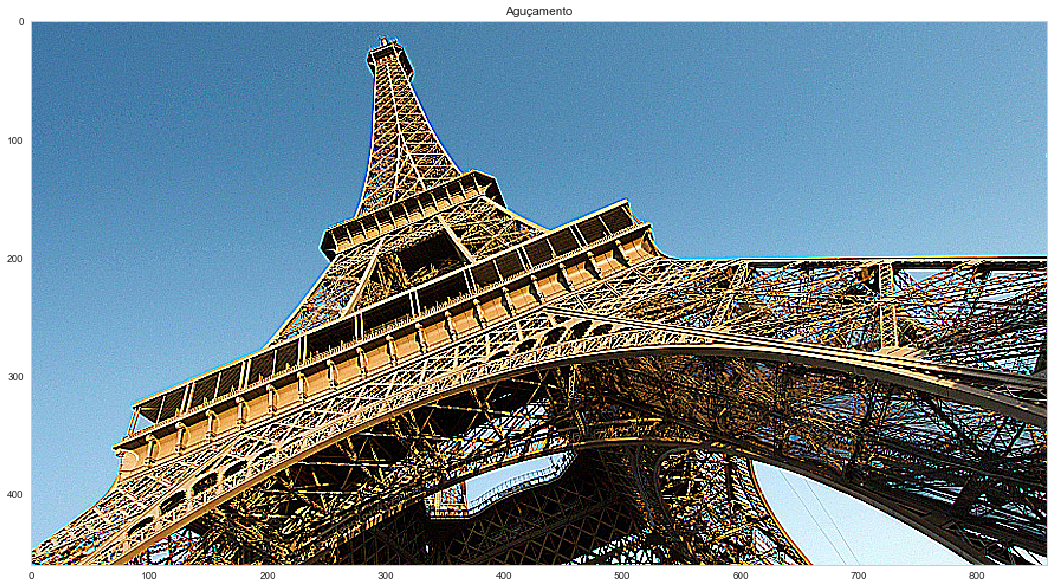

In [5]:
filtro_agucamento = np.array([[-1,-1,-1], [-1, 9, -1], [-1, -1, -1]])
imagem_agucada = cv2.filter2D(imagem, -1, filtro_agucamento)



plt.imshow(imagem_agucada)
plt.title("Aguçamento")

## Thresholding (Limiarização)

Técnicas de filtragem na imagem para remover ruídos ou regiões de interesse baseado no limiar de intensidade dos pixels.
Somente é permitido imagems em escala de cinza.

*Adaptado desta [documentação](https://docs.opencv.org/3.4.3/d7/d4d/tutorial_py_thresholding.html) do OpenCV*

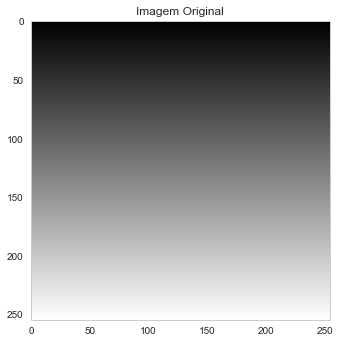

In [85]:
imagem = cv2.imread("imagens/gradiente.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.title("Imagem Original")
plt.imshow(imagem)

Text(0.5,1,'Limiarização binária')

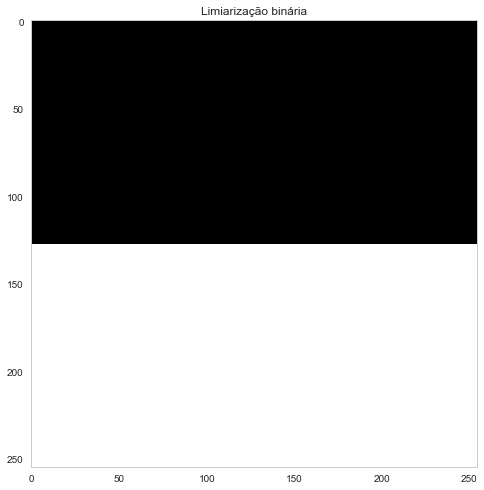

In [86]:
ret, imagem_limiarizada = cv2.threshold(imagem, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 10))
plt.imshow(imagem_limiarizada)
plt.title("Limiarização binária")

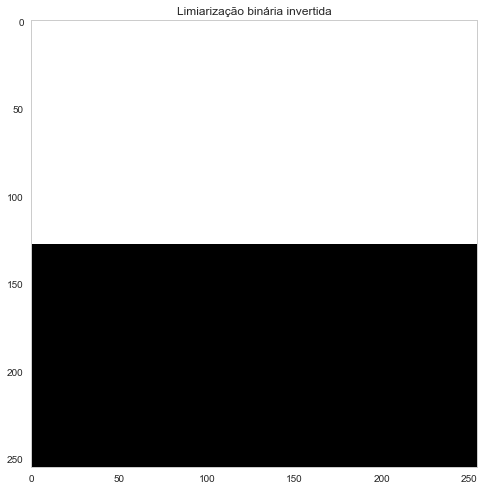

In [87]:
ret, imagem_limiarizada = cv2.threshold(imagem, 127, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(8, 10))
plt.title("Limiarização binária invertida")
plt.imshow(imagem_limiarizada)

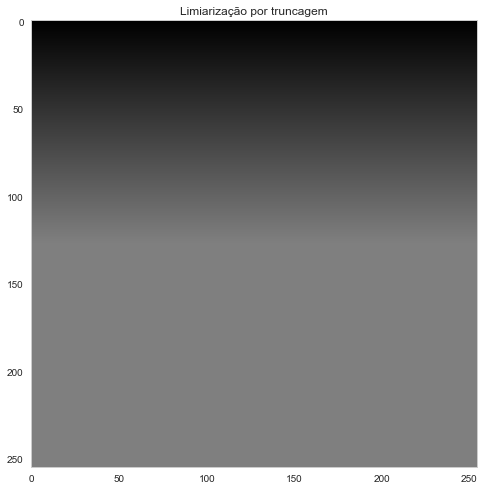

In [88]:
ret, imagem_limiarizada = cv2.threshold(imagem, 127, 255, cv2.THRESH_TRUNC)

plt.figure(figsize=(8, 10))
plt.title("Limiarização por truncagem")
plt.imshow(imagem_limiarizada)

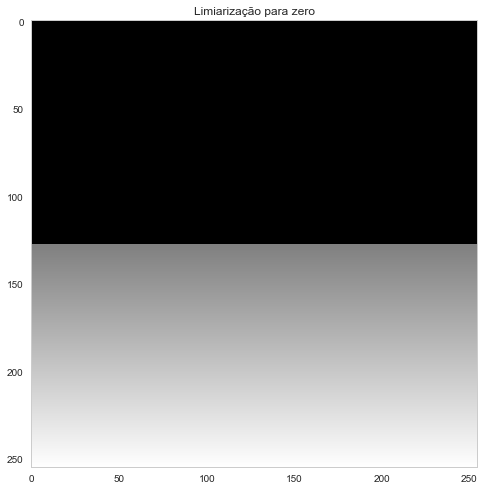

In [89]:
ret, imagem_limiarizada = cv2.threshold(imagem, 127, 255, cv2.THRESH_TOZERO)

plt.figure(figsize=(8, 10))
plt.title("Limiarização para zero")
plt.imshow(imagem_limiarizada)

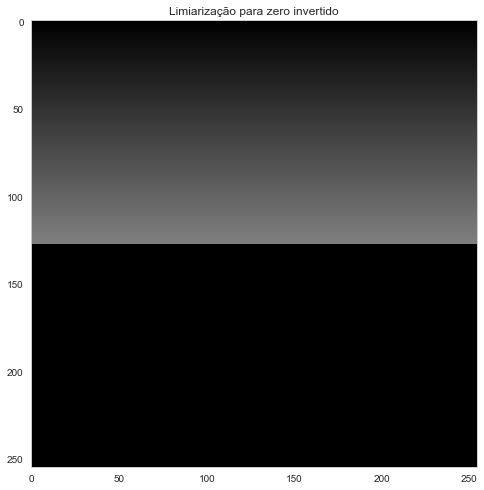

In [90]:
ret, imagem_limiarizada = cv2.threshold(imagem, 127, 255, cv2.THRESH_TOZERO_INV)

plt.figure(figsize=(8, 10))
plt.title("Limiarização para zero invertido")
plt.imshow(imagem_limiarizada)

### Limiar adaptativo

Este tipo de limiar é mais suave e obtem melhores resultados particularmente em operações voltadas a documentos para etapas de OCR. 
A característica de adaptividade permite que o efeito do limiar leve em consideração aspectos internos da imagem e não seja penas um filtro que ignora toda informação em função dos limiares configurados.

*Adaptado desta [documentação](https://docs.opencv.org/3.4.3/d7/d4d/tutorial_py_thresholding.html) do OpenCV.*

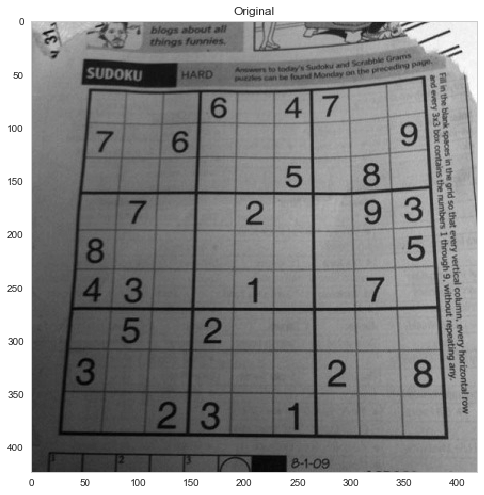

In [91]:
imagem = cv2.imread("imagens/sudoku.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 10))
plt.title("Original")
plt.imshow(imagem, cmap="gray")

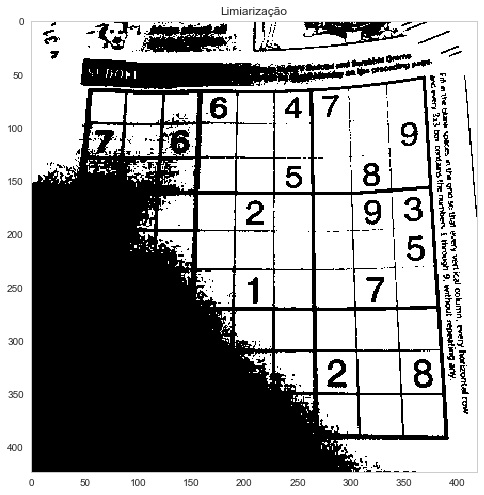

In [92]:
ret, imagem_limiarizada = cv2.threshold(imagem, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 10))
plt.title("Limiarização")
plt.imshow(imagem_limiarizada, cmap="gray")

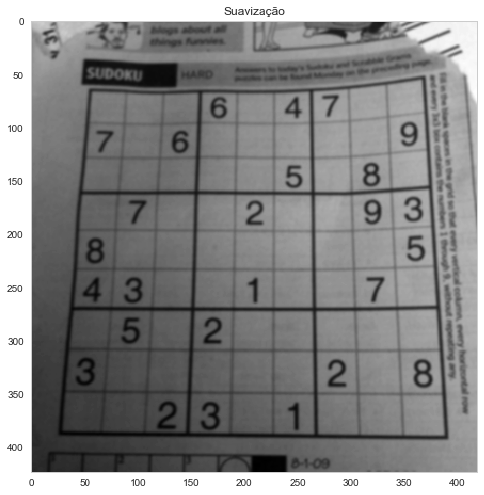

In [93]:
imagem_suavizada = cv2.GaussianBlur(imagem, (5,5), 0)

plt.figure(figsize=(8, 10))
plt.title("Suavização")
plt.imshow(imagem_suavizada, cmap="gray")

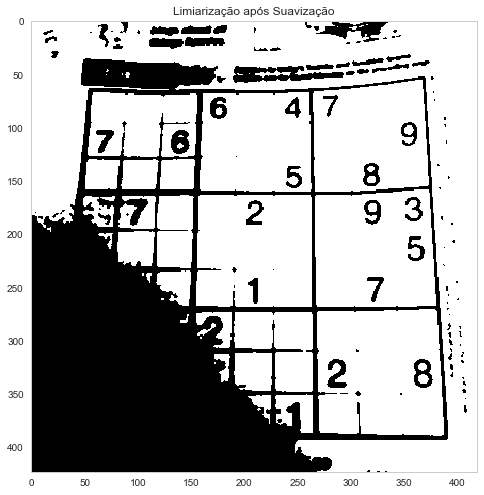

In [94]:
ret, imagem_limiarizada = cv2.threshold(imagem_suavizada, 90, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 10))
plt.title("Limiarização após Suavização")
plt.imshow(imagem_limiarizada, cmap="gray")

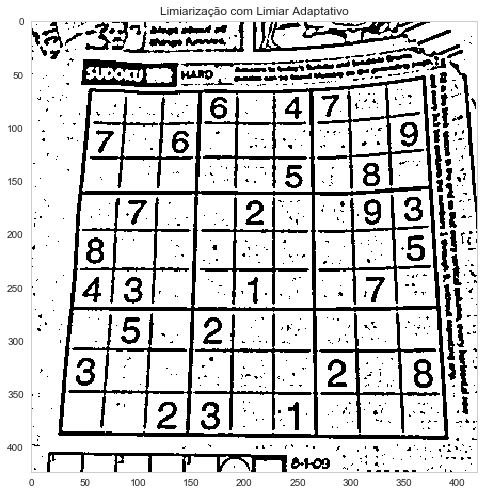

In [95]:
imagem_limiarizada = cv2.adaptiveThreshold(imagem_suavizada, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# O primeiro valor do parâmetro é o tamanho da janela, portanto sempre ímpar para considerar o valor do contro

plt.figure(figsize=(8, 10))
plt.title("Limiarização com Limiar Adaptativo")
plt.imshow(imagem_limiarizada, cmap="gray")

## Erosão e Dilatação

São operações morfológicas que visam restarurar informação na imagem aplicando operações que podem, por exemplo, completar pixels adjacentes ou removê-los.

Quando trabalhamos com OCR em imagens obtidas de scanners ou placas de veículos de automóveis, dada a qualidade da captura destas imagens nem sempre é preservad a informação com mesma nitidez o suficiente para algoritmos de OCR (como o _Tesseract_) identificarem os carcteres adequadamente.

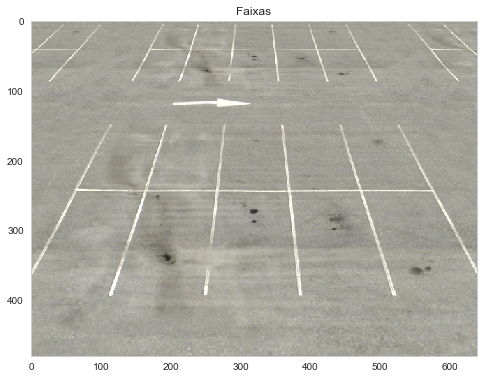

In [83]:
imagem = cv2.imread("imagens/lanes.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 10))
plt.title("Faixas")
plt.imshow(imagem)

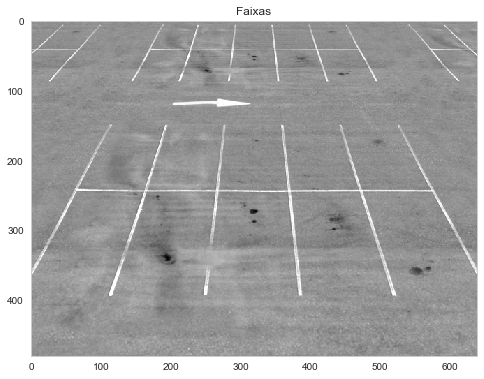

In [82]:
imagem_gray = cv2.imread("imagens/lanes.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 10))
plt.title("Faixas")
plt.imshow(imagem_gray, cmap="gray")

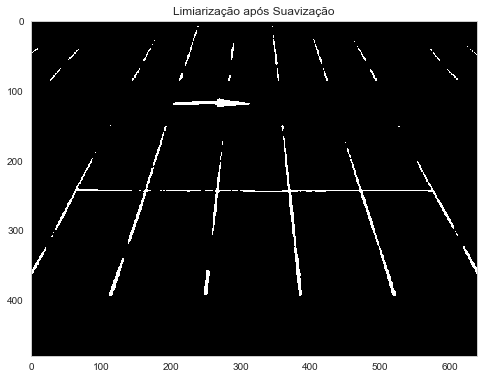

In [81]:
imagem_suavizada = cv2.GaussianBlur(imagem_gray, (5,5), 0)
ret, imagem_limiarizada = cv2.threshold(imagem_suavizada, 200, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 10))
plt.title("Limiarização após Suavização")
plt.imshow(imagem_limiarizada, cmap="gray")

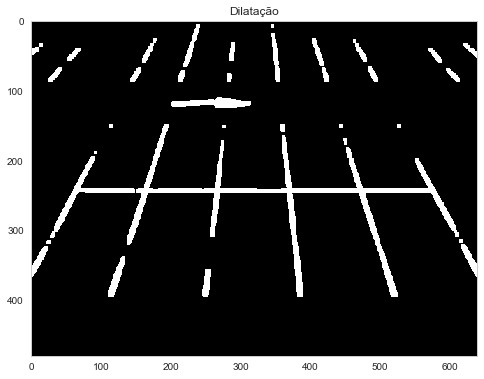

In [80]:
kernel = np.ones((5,5), np.uint8)
imagem_dilatacao = cv2.dilate(imagem_limiarizada, kernel, iterations=1)

plt.figure(figsize=(8, 10))
plt.title("Dilatação")
plt.imshow(imagem_dilatacao, cmap="gray")

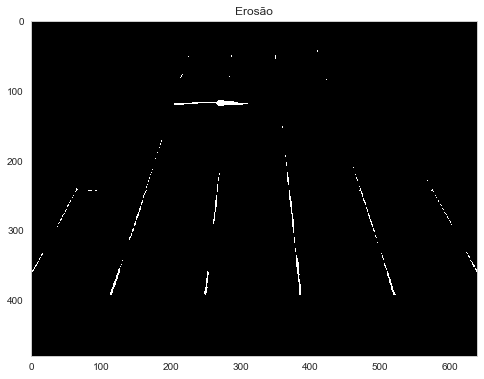

In [79]:
kernel = np.ones((3,3), np.uint8)
imagem_erosao = cv2.erode(imagem_limiarizada, kernel, iterations=1)

plt.figure(figsize=(8, 10))
plt.title("Erosão")
plt.imshow(imagem_erosao, cmap="gray")

## Detecção de bordas

Os operações de detecção de bordas é o primeiro passo para segmentação de imagens, pois torna possível identificar objetos.
Existem diversas formas de detectar bordas, das quais a que mais se destaca é o método de Canny.

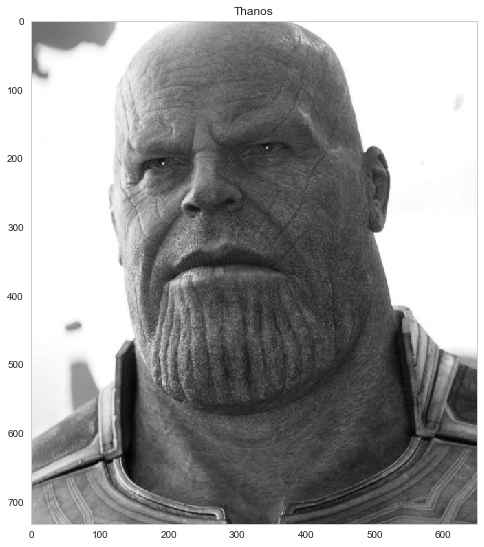

In [110]:
imagem_gray = cv2.imread("imagens/thanos2.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 10))
plt.title("Thanos")
plt.imshow(imagem, cmap="gray")

### Método Sobel

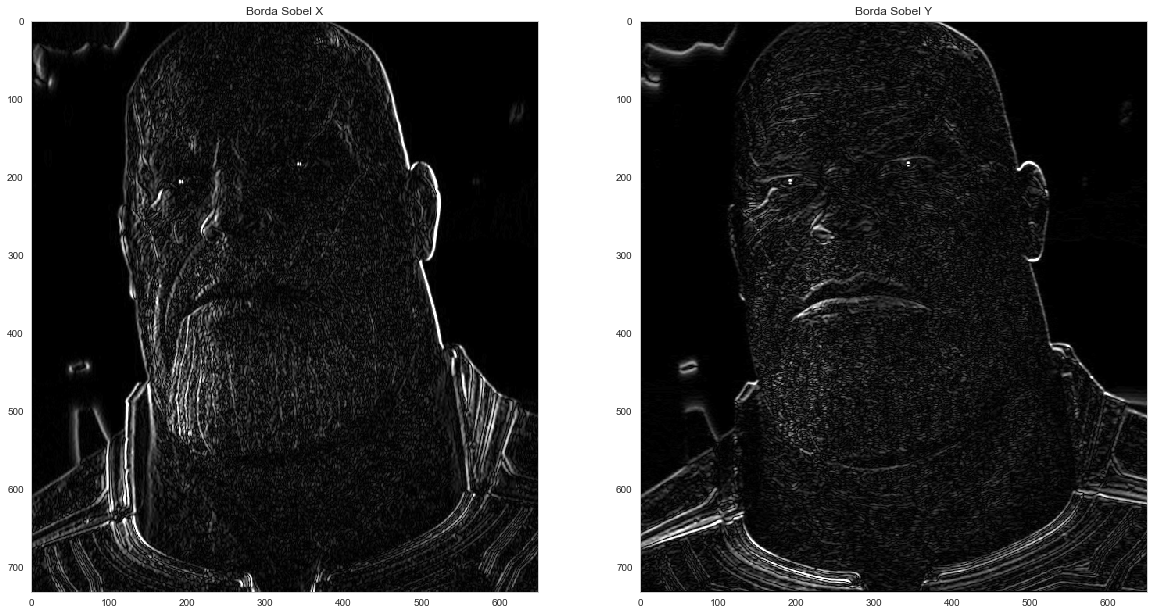

In [111]:
# Aplicando suavização
imagem_suavizada = cv2.GaussianBlur(imagem_gray,(3,3),0)

# Aplicando os detectores de bordas de Sobel
# Este tipo de detector demanda que a imagem seja convertida para um espaço de cores de 64 bits
borda_sobel_x = cv2.Sobel(imagem_suavizada, cv2.CV_64F, 1, 0, ksize=3, delta=0)
borda_sobel_y = cv2.Sobel(imagem_suavizada, cv2.CV_64F, 0, 1, ksize=3, delta=0)

# Conversão para o espaço adequado de cores de 8 bits
borda_sobel_x = cv2.convertScaleAbs(sobel_x)
borda_sobel_y = cv2.convertScaleAbs(sobel_y)

plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.title("Borda Sobel X")
plt.imshow(borda_sobel_x, cmap="gray")

plt.subplot(1,2,2)
plt.title("Borda Sobel Y")
plt.imshow(borda_sobel_y, cmap="gray")

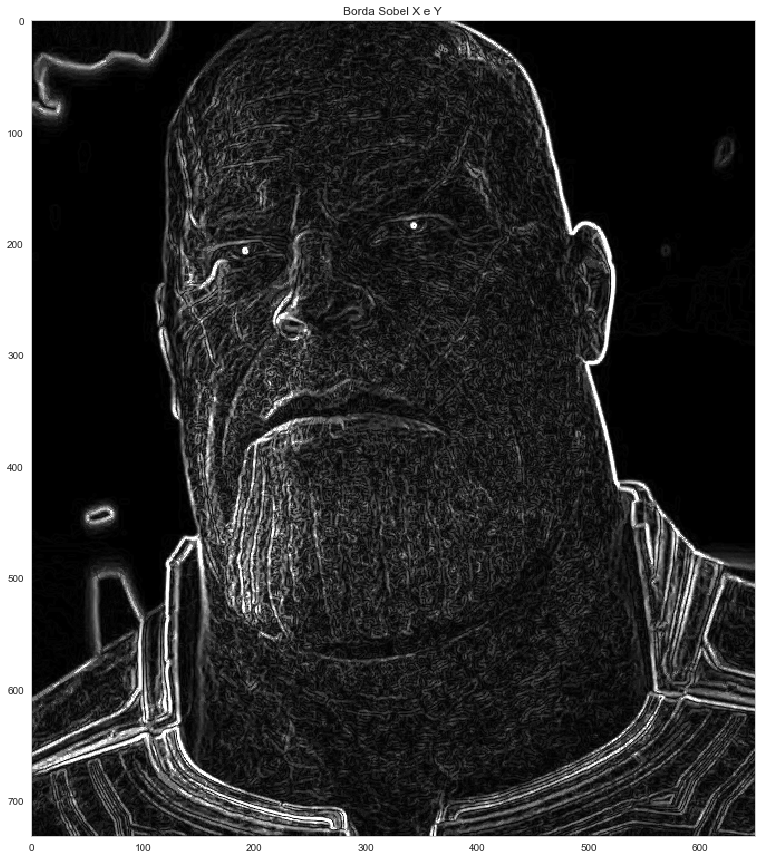

In [103]:
# Unindo os dois componentes
borda_sobel_xy = cv2.bitwise_or(borda_sobel_x, borda_sobel_y)

plt.figure(figsize=(15, 15))
plt.title("Borda Sobel X e Y")
plt.imshow(borda_sobel_xy, cmap="gray")

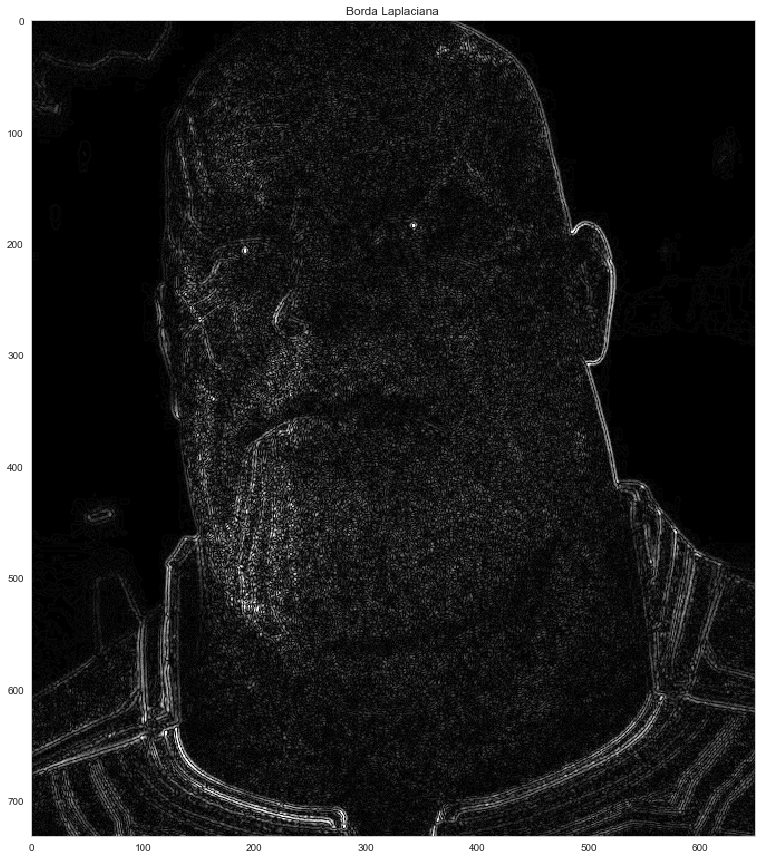

In [106]:
# Borda laplaciana realiza as transformações no espaço de cores de 16 bits
borda_laplaciana = cv2.Laplacian(imagem_suavizada, cv2.CV_16S, 3, scale=5)

# Convertendo para o formato padrão de 8 bits
borda_laplaciana = cv2.convertScaleAbs(borda_laplaciana)

plt.figure(figsize=(15, 15))
plt.title("Borda Laplaciana")
plt.imshow(borda_laplaciana, cmap="gray")

### Método Canny

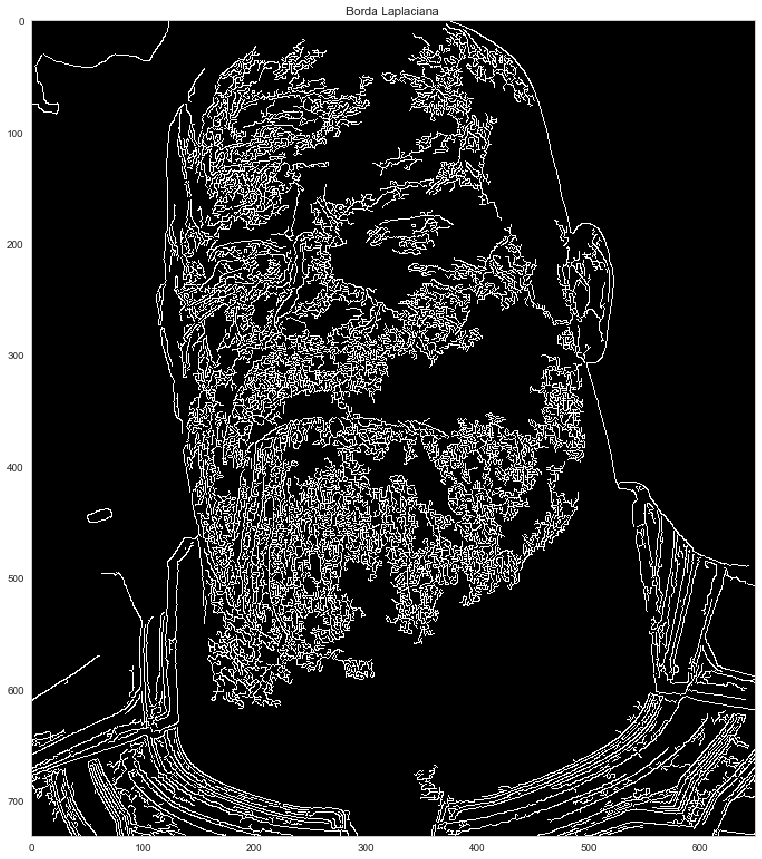

In [112]:
borda_canny = cv2.Canny(imagem_gray, 30, 190)

plt.figure(figsize=(15, 15))
plt.title("Borda Laplaciana")
plt.imshow(borda_canny, cmap="gray")

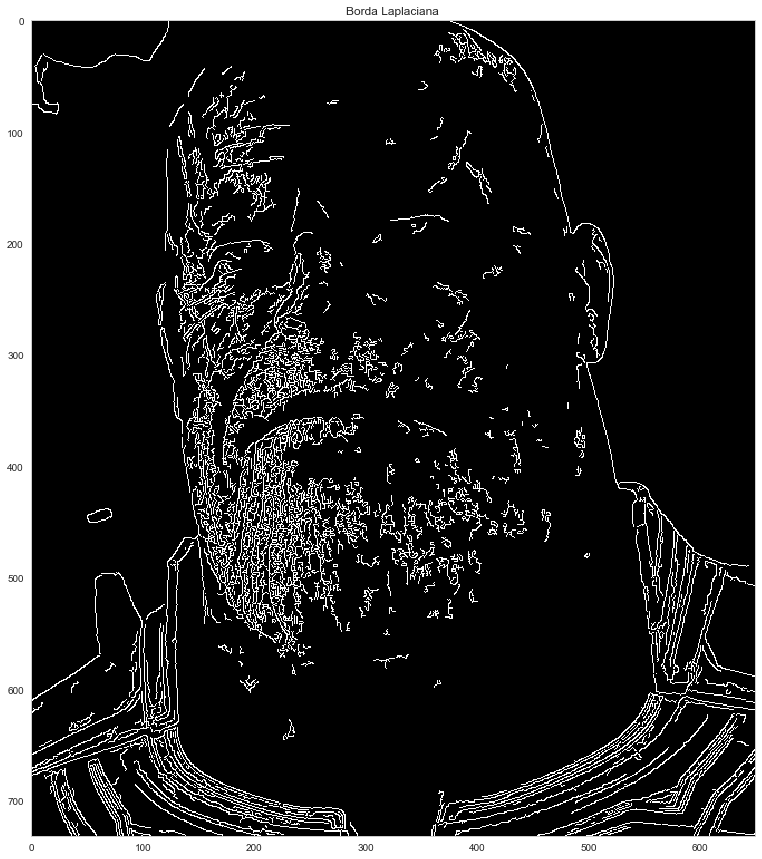

In [114]:
borda_canny = cv2.Canny(imagem_gray, 70, 150)

plt.figure(figsize=(15, 15))
plt.title("Borda Laplaciana")
plt.imshow(borda_canny, cmap="gray")

# Segmentação de imagens

Técnicas para identificação de objetos e formas.

## Contornos (*contours*)

O primeiro passo para identificar contornos de objetos em imagens é aplicando operações de identificação de contornos.

(778, 1280, 3)


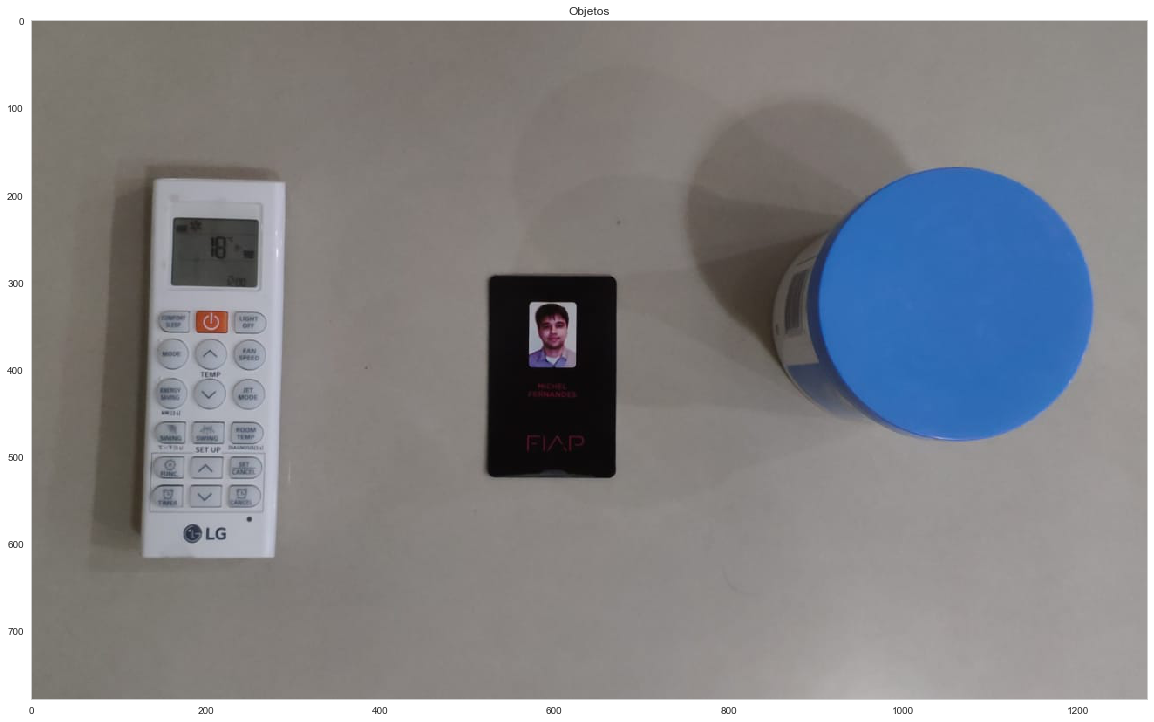

In [263]:
imagem_objetos = cv2.imread("imagens/formas.jpeg")
imagem_objetos = cv2.cvtColor(imagem_objetos, cv2.COLOR_BGR2RGB)

print(imagem_objetos.shape)

plt.figure(figsize=(20, 20))
plt.title("Objetos")
plt.imshow(imagem_objetos)

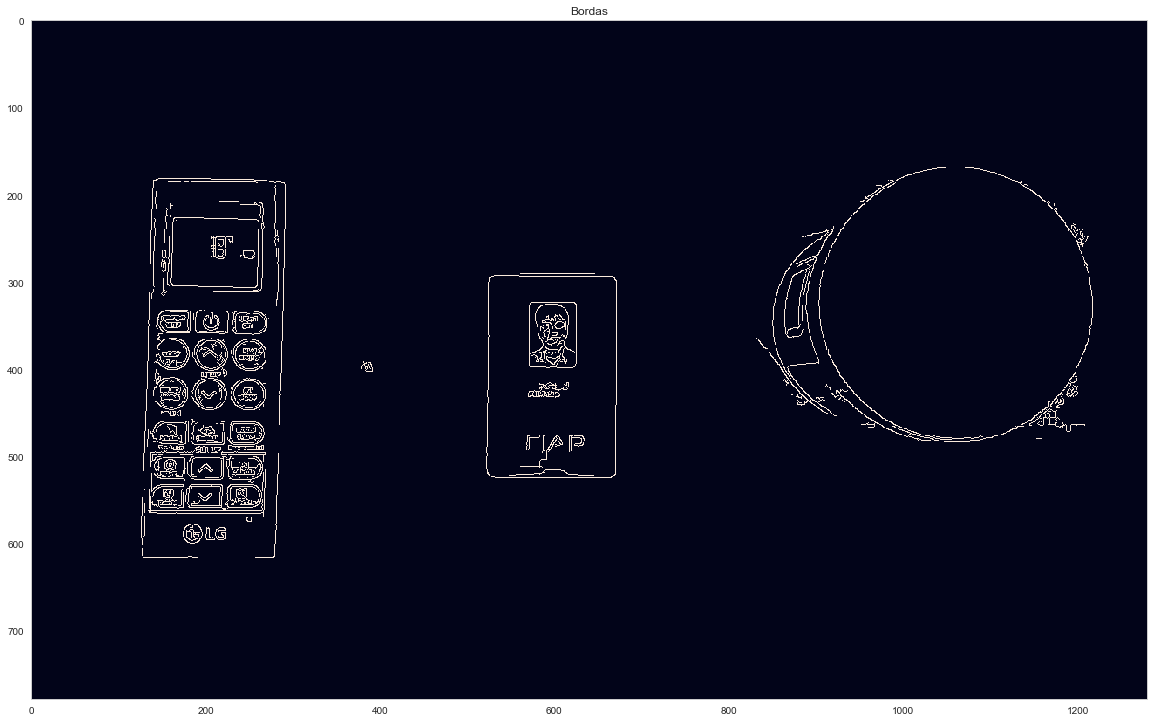

In [264]:
imagem_objetos_gray = cv2.cvtColor(imagem_objetos,cv2.COLOR_BGR2GRAY)
imagem_objetos_bordas = cv2.Canny(imagem_objetos_gray, 1, 100)

plt.figure(figsize=(20, 20))
plt.title("Bordas")
plt.imshow(imagem_objetos_bordas)

Contornos encontrados 16


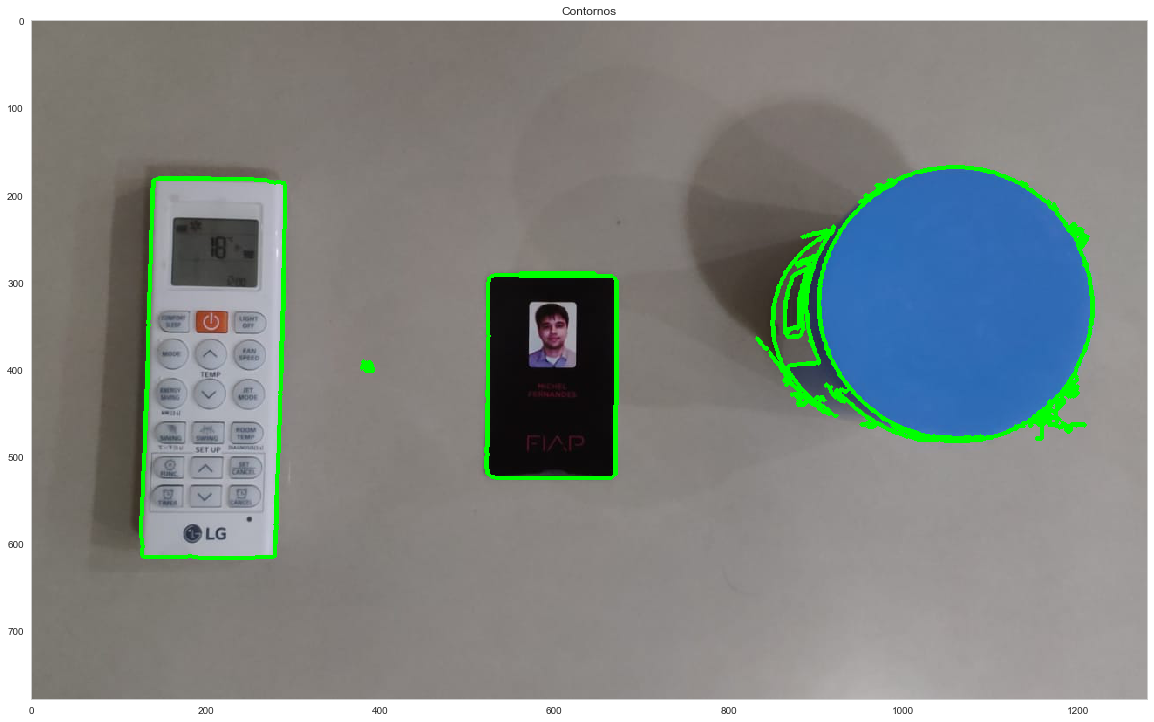

In [266]:
_, contornos_objetos, hierarchy_objetos = cv2.findContours(imagem_objetos_bordas, 
                                                           cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contornos_objetos)))

imagem_objetos_contornos = imagem_objetos.copy()
cv2.drawContours(imagem_objetos_contornos, contornos_objetos, -1, (0,255,0), 3)

plt.figure(figsize=(20, 20))
plt.title("Contornos")
plt.imshow(imagem_objetos_contornos)

Utilizando formas abertas da mesma imagem.

In [267]:
_, contornos_objetos_internos, hierarchy = cv2.findContours(imagem_objetos_bordas, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contornos_objetos_internos)))

for idx, contorno in enumerate(contornos_objetos_internos):
    (x, y, w, h) = cv2.boundingRect(contorno)
    area = int(w) * int(h)
    print("Contorno " + str(idx) + " " + str(area))
    roi = imagem_objetos[y:y+h, x:x+w]
    cv2.imwrite("imagem_"+str(idx)+".png", roi)

Contornos encontrados 337
Contorno 0 9
Contorno 1 210
Contorno 2 16
Contorno 3 154
Contorno 4 224
Contorno 5 195
Contorno 6 195
Contorno 7 165
Contorno 8 12
Contorno 9 529
Contorno 10 529
Contorno 11 36
Contorno 12 36
Contorno 13 48
Contorno 14 9
Contorno 15 9
Contorno 16 12
Contorno 17 9
Contorno 18 12
Contorno 19 6
Contorno 20 60
Contorno 21 1
Contorno 22 35
Contorno 23 153
Contorno 24 153
Contorno 25 42
Contorno 26 16
Contorno 27 12
Contorno 28 100
Contorno 29 1
Contorno 30 805
Contorno 31 770
Contorno 32 1040
Contorno 33 1107
Contorno 34 325
Contorno 35 75
Contorno 36 1176
Contorno 37 1363
Contorno 38 1
Contorno 39 1
Contorno 40 2
Contorno 41 16
Contorno 42 3
Contorno 43 1
Contorno 44 5
Contorno 45 1
Contorno 46 15
Contorno 47 1
Contorno 48 1036
Contorno 49 44
Contorno 50 9
Contorno 51 2
Contorno 52 2
Contorno 53 252
Contorno 54 392
Contorno 55 16
Contorno 56 153
Contorno 57 15
Contorno 58 16
Contorno 59 2
Contorno 60 187
Contorno 61 16
Contorno 62 81
Contorno 63 40
Contorno 64 640

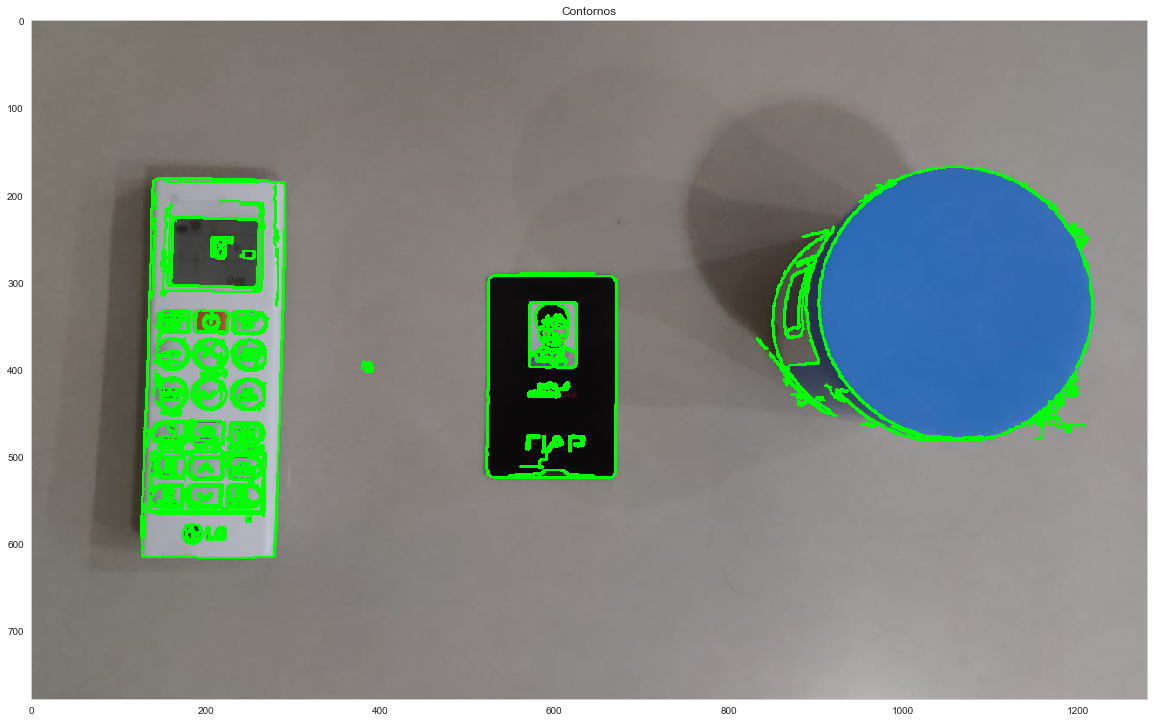

In [268]:
imagem_contornos_internos = imagem_objetos.copy()
cv2.drawContours(imagem_contornos_internos, contornos_objetos_internos, -1, (0,255,0), 2)

plt.figure(figsize=(20, 20))
plt.title("Contornos")
plt.imshow(imagem_contornos_internos)

Os contornos adicionais encontrados são referentes a possíveis ruídos na imagem e na forma que os contornos são identificados. Há formas de conhecer melhor cada contorno e verificar se pode ser desconsiderado.

### Ordenando Contornos

Assim como foi mostrado anteriormente, podemos trabalhar com as informações de contorno para determinar aspectos como área e posição que auxiliam no processo de remoção de ruídos.

(392, 392, 3)


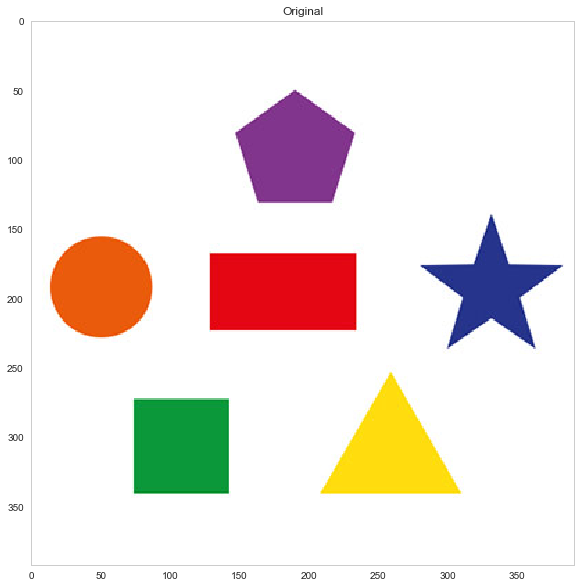

In [243]:
imagem = cv2.imread("imagens/shapes.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

print(imagem.shape)

plt.figure(figsize=(10, 10))
plt.title("Original")
plt.imshow(imagem)

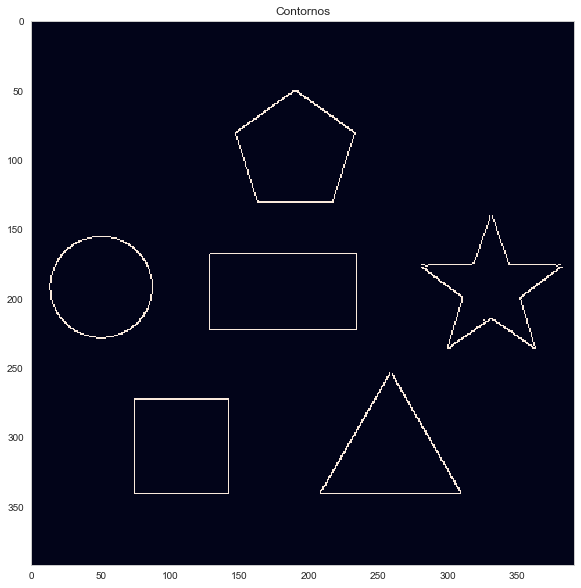

In [258]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem_bordas = cv2.Canny(imagem_gray, 40, 180)

plt.figure(figsize=(10, 10))
plt.title("Contornos")
plt.imshow(imagem_bordas)

Contornos encontrados 7


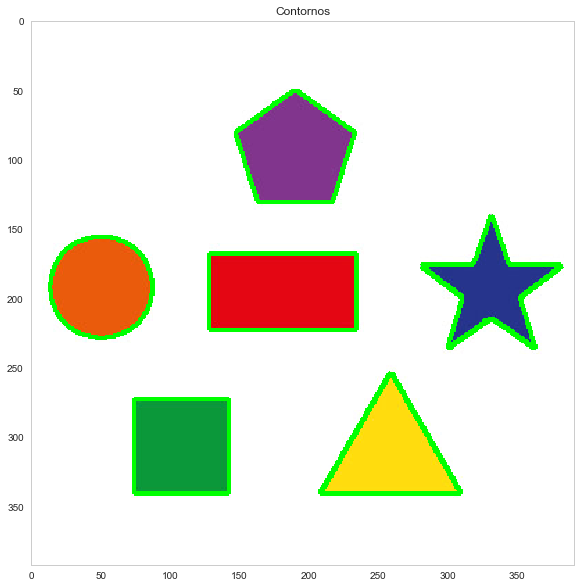

In [259]:
_, contornos, hierarchy = cv2.findContours(imagem_bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contornos_formas)))

imagem_contornos = imagem.copy()

cv2.drawContours(imagem_contornos, contornos_formas, -1, (0,255,0), 2)

plt.figure(figsize=(10, 10))
plt.title("Contornos")
plt.imshow(imagem_contornos)

In [260]:
def areas_contornos(contornos):
    areas = []
    for contorno in contornos:
        area = cv2.contourArea(contorno)
        areas.append(area)
    return areas

In [261]:
areas_contornos(contornos)

[4624.0, 100.0, 5829.5, 4237.5, 89.5, 0.5, 4851.0]

Aqui percebemos áreas bem pequenas como 0,5 e 0,0 que caracterizam ruído. Neste caso podemos fazer uma limpeza nestes contornos para eliminar estes casos.
Para este exemplo vamos arbitrar que somente áreas maiores do que 1 sejam consideradas.

In [262]:
areas_contornos(contornos)
contornos_padronizados = []

for contorno in contornos:
    if cv2.contourArea(contorno) > 1:
        contornos_padronizados.append(contorno)
    
len(contornos), len(contornos_padronizados)

(7, 6)

Na análise visual, agora o número de contornos identificados batem.

A função a seguir vai localizar o centróide de cada objeto na imagem para colocarmos um determinado texto. Este texto utilizaremos para identificar as imagens por tamanho de área e por posicionamento, as seguir.

In [249]:
def label_centroide(imagem, contorno, identificacao):
    M = cv2.moments(contorno)
    cx = int(M["m10"]/M["m00"])
    cy = int(M["m01"]/M["m00"])
    cv2.putText(imagem, str(identificacao), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

Ordenação decrescente baseado no tamanho da área. A função *sorted* irá analisar todos os itens do array de contornos, aplicar a função de cálculo de área e ordederá de forma reversa.

In [250]:
contornos_ordenacao = sorted(contornos_padronizados, key=cv2.contourArea, reverse=True)

In [251]:
len(contornos_ordenacao)

6

In [252]:
imagem_contornos = imagem.copy()

for idx, contorno in enumerate(contornos_ordenacao):
    label_centroide(imagem_contornos, contorno, idx+1)
    print("Processando contorno " + str(idx))

Processando contorno 0
Processando contorno 1
Processando contorno 2
Processando contorno 3
Processando contorno 4
Processando contorno 5


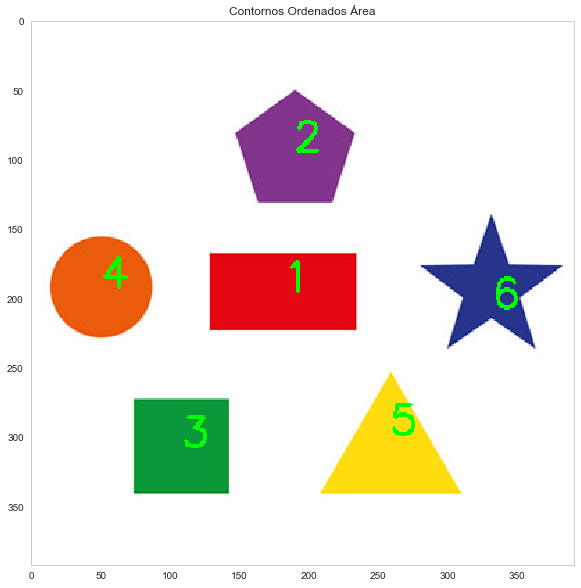

In [210]:
plt.figure(figsize=(10, 10))
plt.title("Contornos Ordenados Área")
plt.imshow(imagem_contornos)

Ordenação por posicionamento.

A função a seguir obterá a coordenada X de cada contorno, assim será possível ordenar as imagens por esta coordenada.

In [208]:
def posicao_x(contorno):
    M = cv2.moments(contorno)
    cx = int(M["m10"]/M["m00"])
    return cx

In [209]:
contornos_ordenados_x = sorted(contornos_padronizados, key=posicao_x, reverse=False)

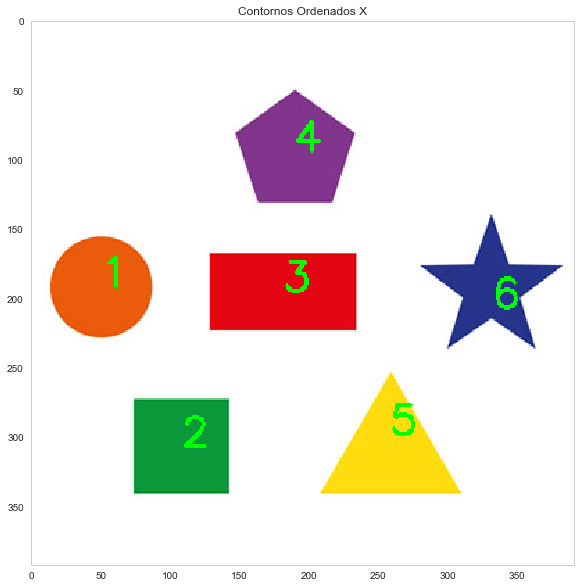

In [212]:
imagem_contornos = imagem.copy()

for idx, contorno in enumerate(contornos_ordenados_x):
    label_centroide(imagem_contornos, contorno, idx+1)
    
plt.figure(figsize=(10, 10))
plt.title("Contornos Ordenados X")
plt.imshow(imagem_contornos)

## Aproximação de contornos e *convex hull* (casca convexa)

Da uma imagem podemos aplicar técnicas de segmentação baseadas em sobreposição de retângulos e aproximações de contornos.

(778, 1280, 3)


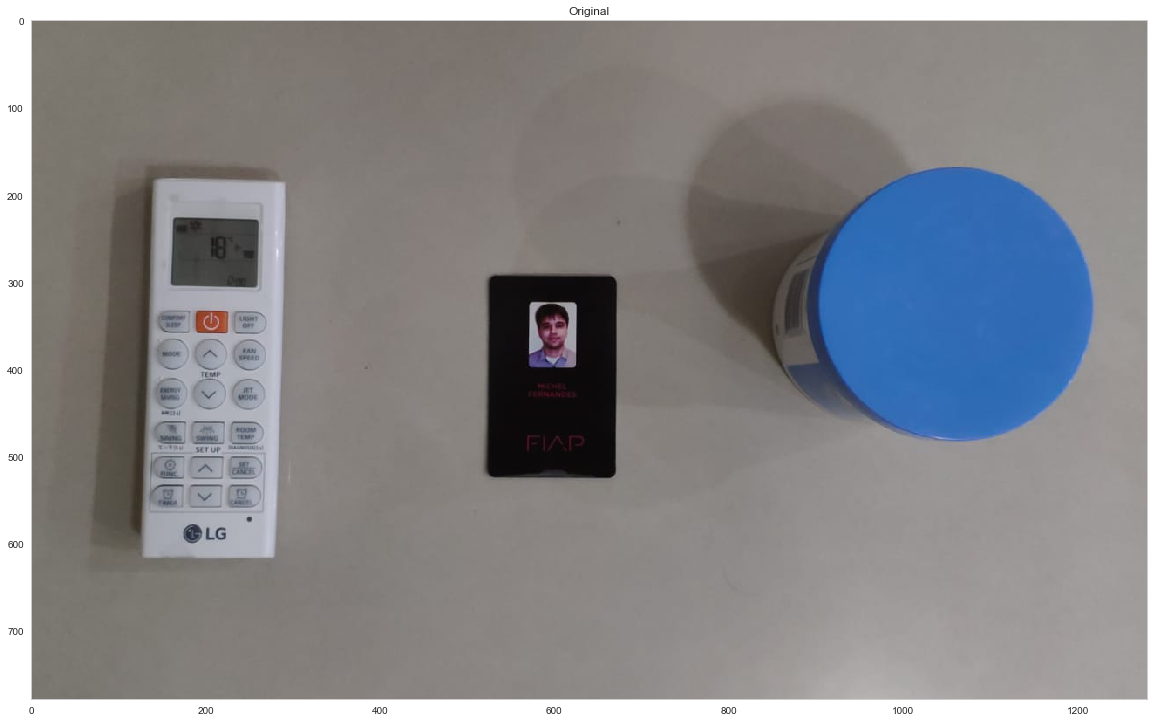

In [230]:
imagem = cv2.imread("imagens/formas.jpeg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

print(imagem.shape)

plt.figure(figsize=(20, 20))
plt.title("Original")
plt.imshow(imagem)

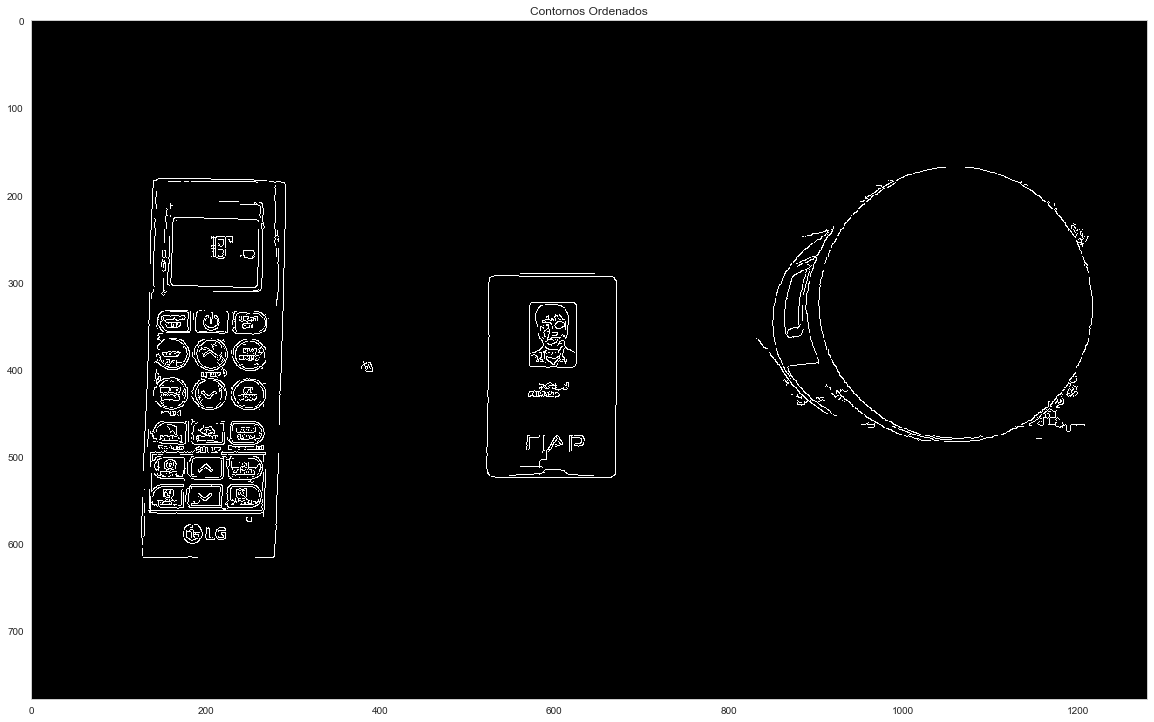

In [231]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem_bordas = cv2.Canny(imagem_gray, 1, 100)

plt.figure(figsize=(20, 20))
plt.title("Contornos Ordenados")
plt.imshow(imagem_bordas, cmap="gray")

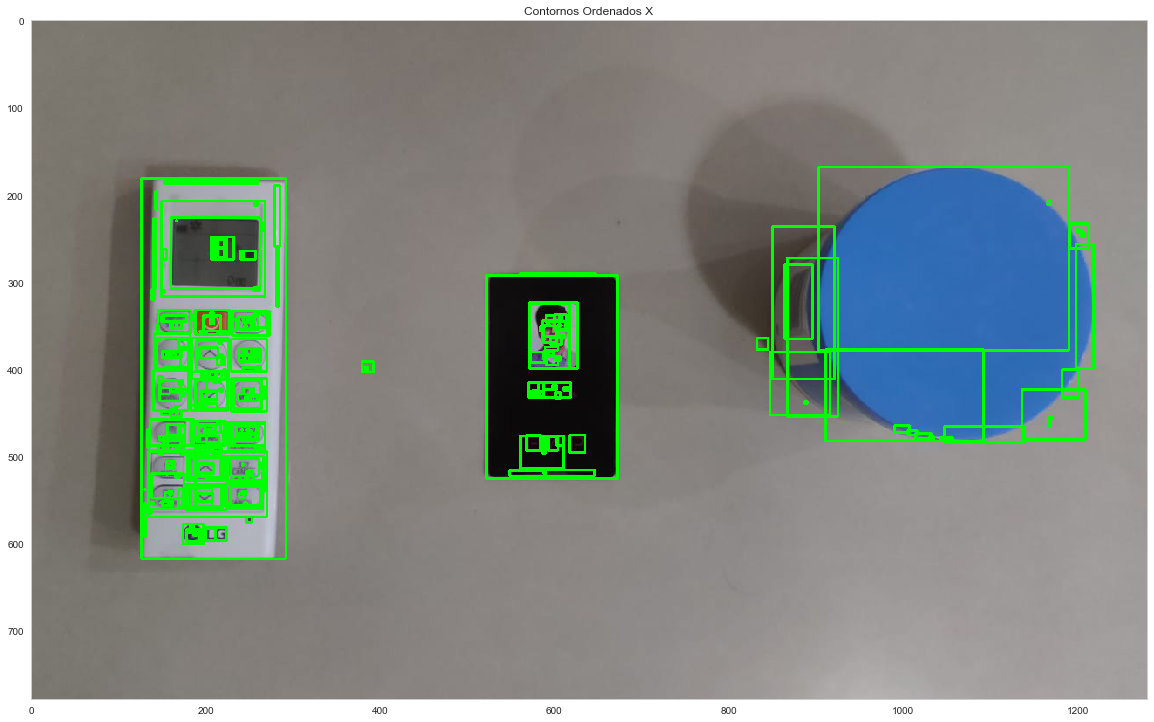

In [232]:
_, contornos, hierarchy = cv2.findContours(imagem_bordas, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

image_retangulo_delimitador = imagem.copy()

for contorno in contornos:
    (x, y, w, h) = cv2.boundingRect(contorno)
    cv2.rectangle(image_retangulo_delimitador, (x,y), (x+w,y+h), (0, 255, 0), 2)

plt.figure(figsize=(20, 20))
plt.title("Contornos Ordenados X")
plt.imshow(image_retangulo_delimitador)

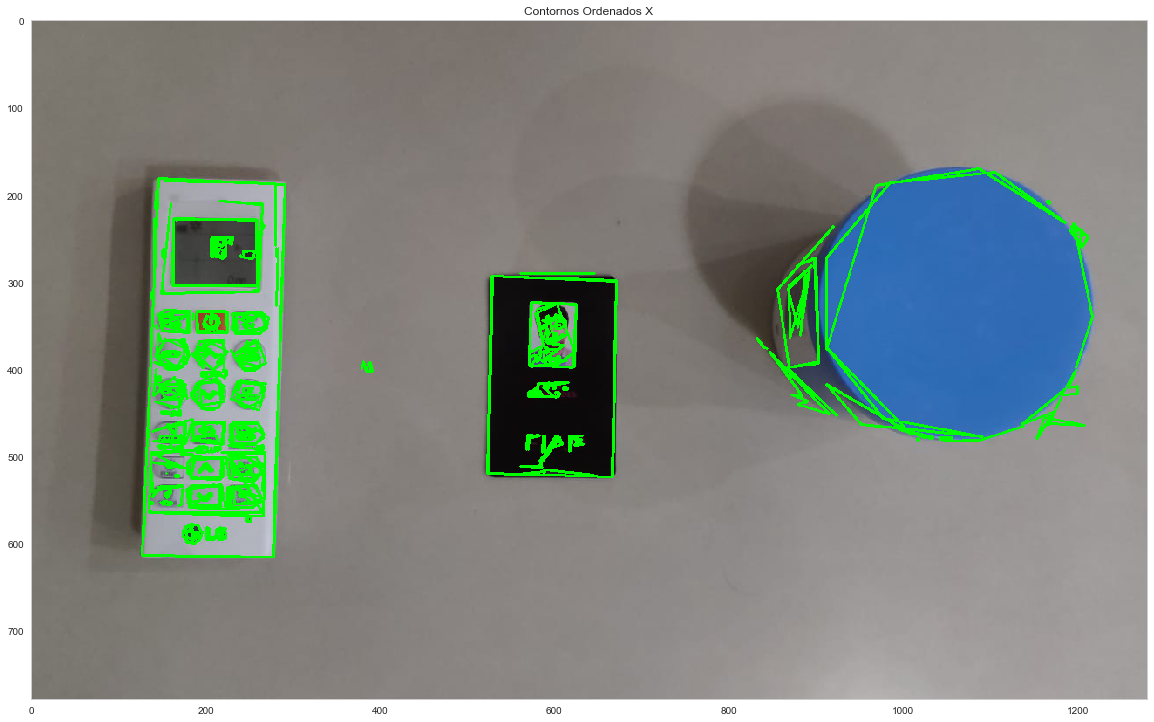

In [233]:
imagem_contorno_poligonos = imagem.copy()

for contorno in contornos:
    similaridade = 0.03 * cv2.arcLength(contorno, True)
    aproximacao_poligono = cv2.approxPolyDP(contorno, similaridade, True)
    cv2.drawContours(imagem_contorno_poligonos, [aproximacao_poligono], 0, (0, 255, 0), 2)

plt.figure(figsize=(20, 20))
plt.title("Contornos Ordenados X")
plt.imshow(imagem_contorno_poligonos)

Aplicando o *convex hull* é mais indicado para detecção de objetos mais complexos, pois ele cria um polígono externo em torno de um objeto.

(387, 600, 3)


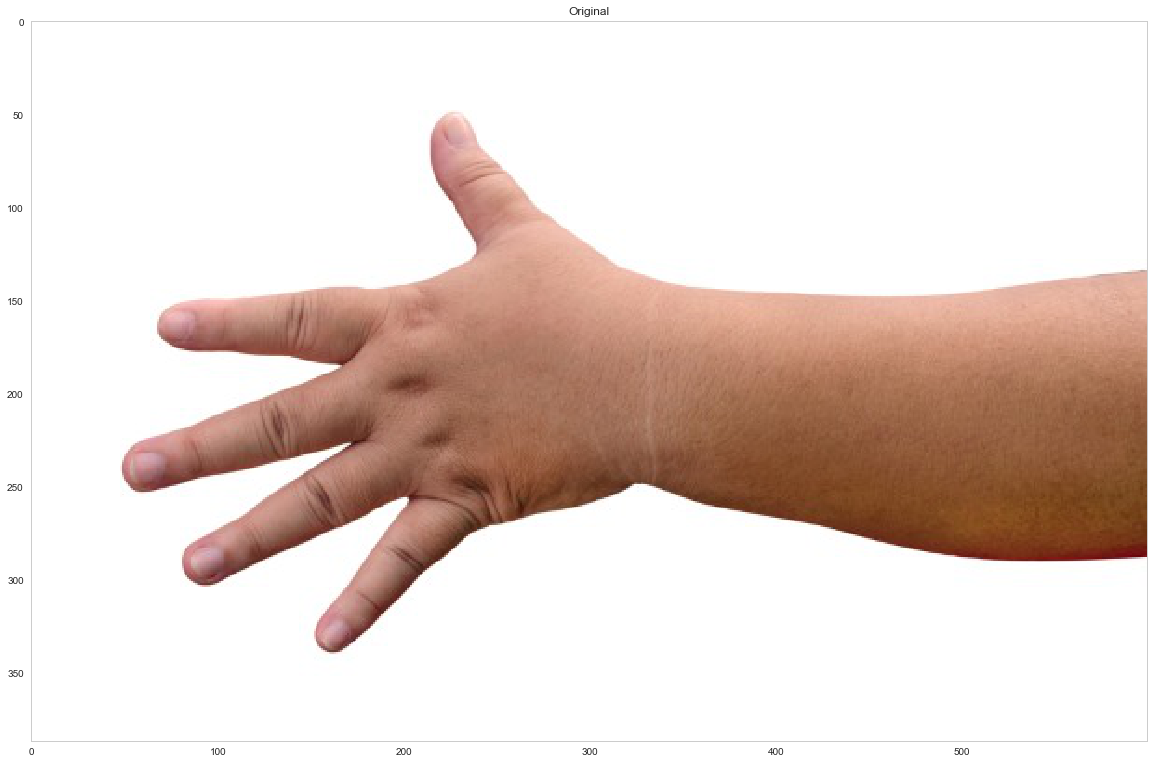

In [235]:
imagem = cv2.imread("imagens/hand.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

print(imagem.shape)

plt.figure(figsize=(20, 20))
plt.title("Original")
plt.imshow(imagem)

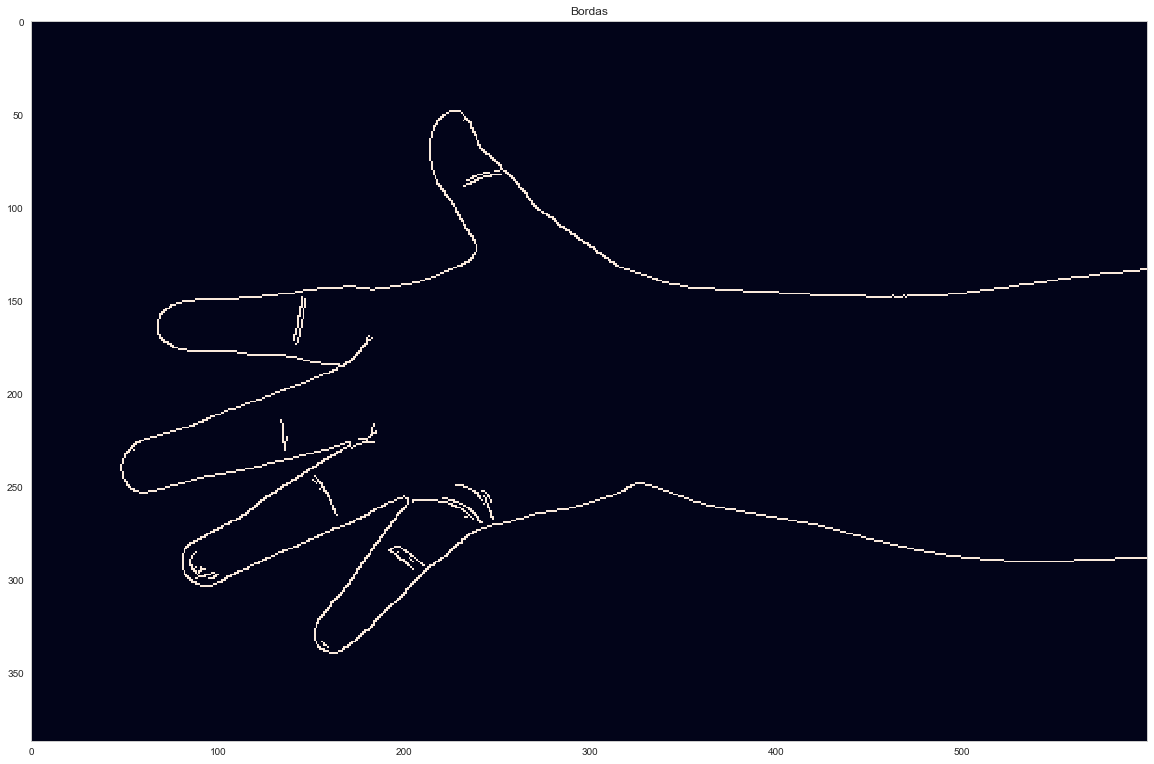

In [236]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem_bordas = cv2.Canny(imagem, 120, 255)

plt.figure(figsize=(20, 20))
plt.title("Bordas")
plt.imshow(imagem_bordas)

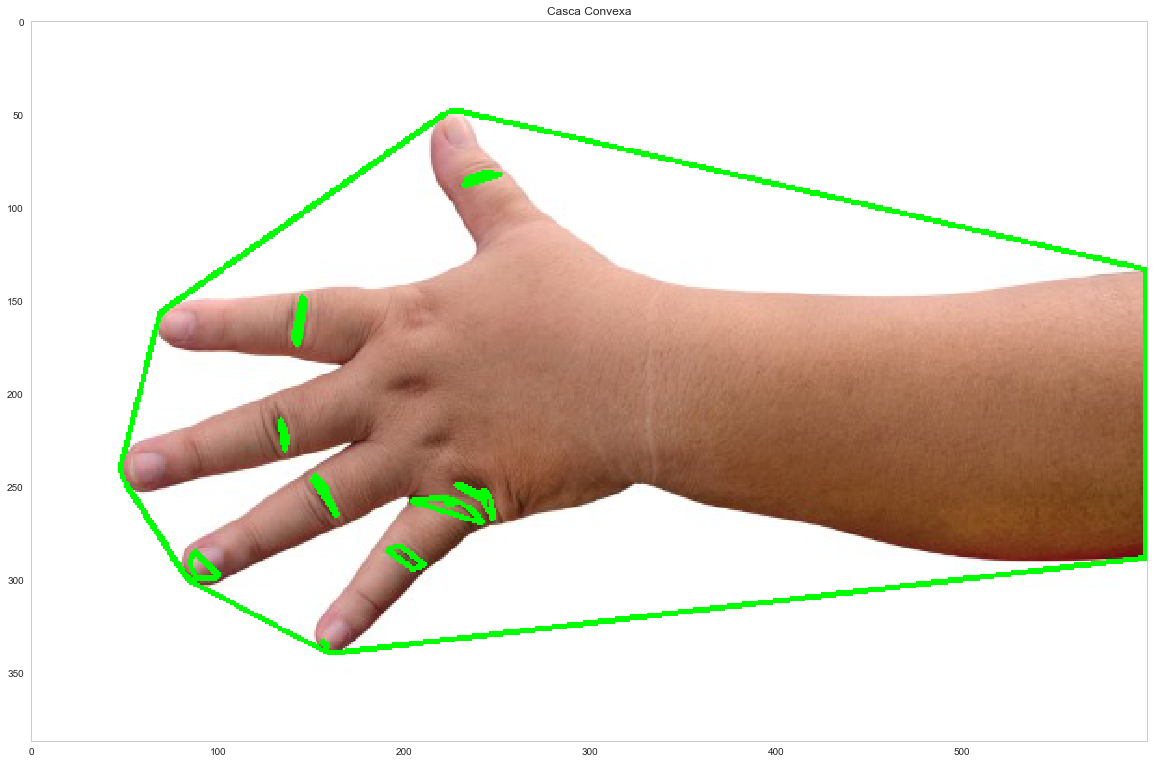

In [241]:
imagem_casca_convexa = imagem.copy()

_, contornos, hierarchy = cv2.findContours(imagem_bordas, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

contornos = sorted(contornos, key=cv2.contourArea, reverse=False)
contornos[:len(contornos)-1]

for contorno in contornos:
    imagem_convex_hull = cv2.convexHull(contorno)
    cv2.drawContours(imagem_casca_convexa, [imagem_convex_hull], 0, (0, 255, 0), 2)

plt.figure(figsize=(20, 20))
plt.title("Casca Convexa")
plt.imshow(imagem_casca_convexa)

0.5
1.0
3.5
4.0
4.0
4.0
6.0
6.0
8.0
8.0
8.0
11.0
17.5
23.0
26.0
27.0
344.0


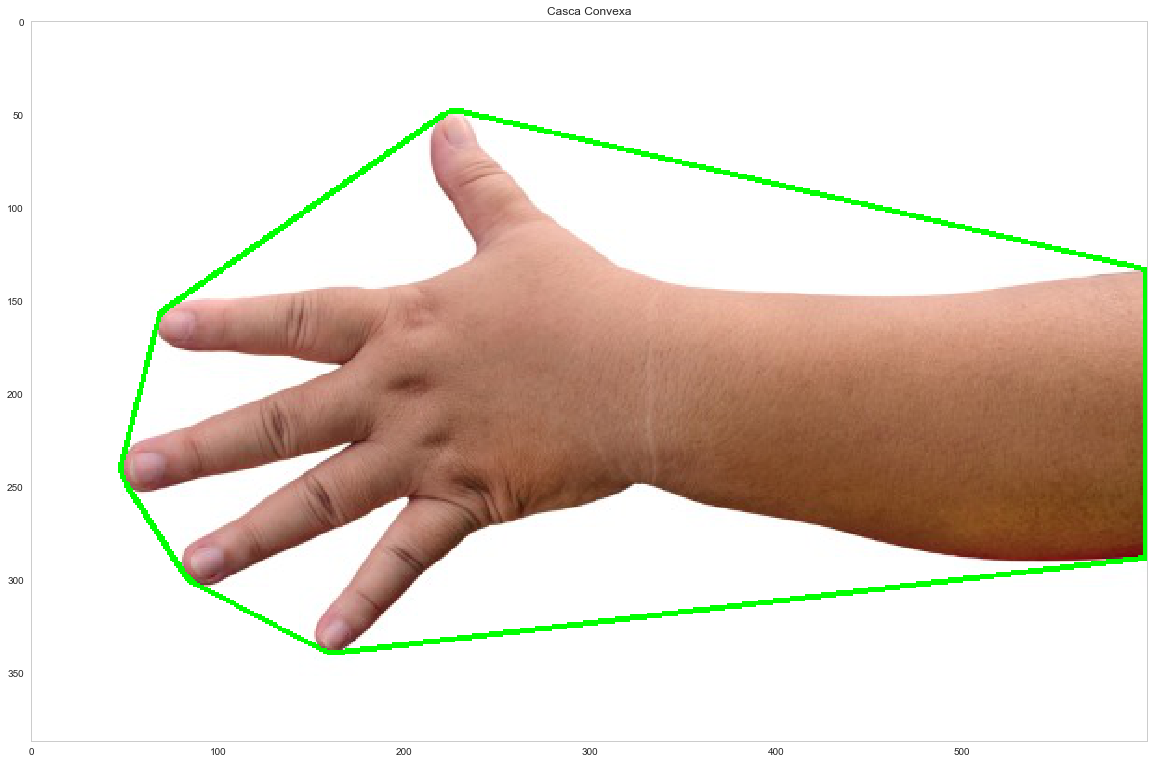

In [242]:
imagem_casca_convexa = imagem.copy()

for contorno in contornos:
    imagem_convex_hull = cv2.convexHull(contorno)
    area = cv2.contourArea(contorno)
    print(area)
    if area > 100:
        cv2.drawContours(imagem_casca_convexa, [imagem_convex_hull], 0, (0, 255, 0), 2)

plt.figure(figsize=(20, 20))
plt.title("Casca Convexa")
plt.imshow(imagem_casca_convexa)